In [1]:
%matplotlib inline

In [2]:
import os

In [3]:
os.chdir(os.path.join('..'))

In [4]:
pwd

'/Users/A.IVA/Documents/jupyter_notebooks/coursera_and_blogs/pytorch/clouds'

In [5]:
data_dir = os.path.join('..', '..','data', 'source', 'clouds')

### 1 Test augmentations

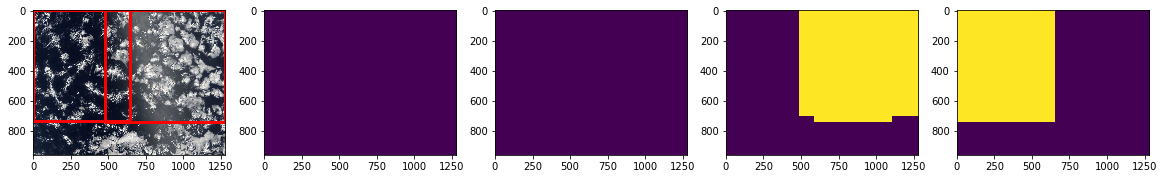

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

from clouds.dataset_v2 import CloudsDataset 
import clouds.torchvision_references.detection.transforms_v2 as T
import albumentations as A
from albumentations import Compose as AlbCompose
from albumentations import (
    PadIfNeeded,
    HorizontalFlip,
    VerticalFlip,    
    BboxParams,
    CenterCrop,    
    Crop,
    CropNonEmptyMaskIfExists,
    Transpose,
    RandomRotate90,
    RandomSizedBBoxSafeCrop,
    ElasticTransform,
    GridDistortion, 
    OpticalDistortion,
    RandomSizedCrop,
    RandomCrop,
    OneOf,
    CLAHE,
    RandomBrightnessContrast,    
    RandomGamma,
    Resize,
    RGBShift,
    Transpose
)


img_dir = os.path.join(data_dir, 'train_images')
labels_path = os.path.join(data_dir, 'train.csv')

augs = [
    OneOf([
        RandomSizedBBoxSafeCrop(width=1280, height=960, erosion_rate=0.2, p=1.0),
        RandomSizedBBoxSafeCrop(width=1280, height=1280, erosion_rate=0.2, p=1.0),
        Resize(width=1200, height=800, p=1.0)
    ], p=1),
    A.augmentations.transforms.ToGray(p=0.25),
    A.augmentations.transforms.ChannelShuffle(p=0.25),
    RGBShift(r_shift_limit=50, g_shift_limit=50, b_shift_limit=50, p=0.5),
    RandomBrightnessContrast(brightness_limit=0.2, contrast_limit=0.2, brightness_by_max=True, p=0.5),
    RandomGamma(p=0.5),
    HorizontalFlip(p=0.25),
    VerticalFlip(p=0.25),
    RandomRotate90(p=0.25),
    Transpose(p=0.25)    
]

comp_aug = AlbCompose(augs,
                      bbox_params=BboxParams(format='pascal_voc',
                                             min_visibility=0.2,
                                             label_fields=['labels']))

# transforms = T.Compose([T.ImgAugmentation(comp_aug), T.ToTensor()])
transforms = T.Compose([T.ImgAugmentation(comp_aug)])

dataset = CloudsDataset(img_dir, 
                        labels_path, 
                        transforms=transforms, 
                        n_el=100)

img, target = dataset[0]

# print(type(img), img.shape, len(dataset))
# print(target.keys())
# target['boxes'], target['labels'], target['image_id'], target['area'], target['iscrowd'], target['masks'].shape

labels = np.array(target['labels'] )

for bbox in target['boxes']:
    cv2.rectangle(img, tuple(bbox[:2]), tuple(bbox[2:]), color=(255, 0, 0), thickness=20)

f, ax = plt.subplots(1, 5, figsize=(20, 5))

ax[0].imshow(img)

for i in range(1,5):
    mask = target['masks'][labels == i].sum(axis=0)
    ax[i].imshow(mask)
